<h1 style='text-align: center;'> SVM Model on Score Prediction </h1>

<h3 style='text-align: center;'> Sarviin Hari </h3>
<hr>

<h2><u><b> Introduction</b></u></h2>

### Aim
The main purpose of this project is to inspect, formulate a model to visualise data and develop machine learning algorithms using data science tools in Python. This project is created to test on:
- Understanding data using basic statistical opertations and Natural Language Processing Tools
- Separate features and labels in a data set
- Normalise the data set
- Split the data into testing and training data
- Using SVM model to perform multi-class classification
- Predicting the testing data and communicating analysis using Quadratic Weighted Kappa
- Providing a concise conclusion

### Structure of Content
1. Read and Describe contents of file
2. Supervised Machine Learning
3. Feature, Label Separation 
4. Train | Test Data Split
5. Binary vs Multi-class Model
6. Data Normalisation
7. Feature Column Selection
8. Support Vector Machine
9. Building a predictive model
10. Predicting from the model built
11. Confusion Matrix
12. QWK Score
13. Kaggle Submission Prediction
 
### Data Description and Exploration
The aim of this project is to utilize Python as a data science tool to investigate and visualize data, as well as build machine learning models. The project will involve analyzing and creating an intelligent system that can classify individuals into credit score ranges based on a combination of banking detaiks and credit-related data that has been gathered over time. Assuming myself as the data scientist's of this company, I am entitled to analyse and preprocess the data before creating machine learning models with the right algorithms to forecast each customer's credit score. As a result of automating this procedure, the system can lessen the manual labour needed to go through enormous volumes of data. At teh same time this also offers a more precise and effective way to determine credit scores.

<h2><u><b>Import Necessary Libraries</b></u></h2>

In [5]:
import csv
import numpy as np
import pandas as pd
# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

<h2><u><b>Basic Descriptive Statistic of Data</b></u></h2>

In [6]:
credit_score_dataset = pd.read_csv('Credit-Scores-Dataset.csv')

In [8]:
credit_score_dataset.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,106981,8,41,2,14619.585,1005.298750,7,7,19,1,...,2,125.33,38.883189,222,1,11.620889,32.846250,202,279.724565,2
1,108774,1,28,12,70883.440,5663.953333,4,4,10,3,...,2,604.77,31.131854,356,0,97.133997,39.858686,201,526.033197,2
2,111896,3,29,12,14395.830,1027.652500,8,8,28,7,...,1,2841.00,37.587389,27,1,74.795382,31.947738,201,258.713002,1
3,32731,2,25,1,11189.065,1159.422083,6,3,15,3,...,2,761.18,33.980973,126,0,18.439801,16.806258,201,324.284100,2
4,128760,7,37,3,78956.730,6523.727500,7,3,14,2,...,2,436.82,27.684657,265,1,128.558654,70.788144,102,669.025667,2


The head() function in pandas library gets the first 5 rows of data from the csv file. This allows us to get a basic idea on the columns in the data set and the values for each columns in the data set

In [387]:
credit_score_dataset.shape

(2100, 24)

The shape attribute allows us to understand the numbe rof rows and columns in the data set. Form this data set, we can see the data set has 2100 rows and 24 columns

In [388]:
credit_score_dataset.dtypes

ID                            int64
Month                         int64
Age                           int64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

The dtypes attributes shows the types of data in each column of the data set. This allows us to understand howthe data can be manipulated. From this data, we understand that all of the data are numerical data consisting of either integers or float values

In [389]:
credit_score_dataset.describe()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.00000,...,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,83333.452381,4.411429,33.197143,7.927619,51244.805155,4255.554221,5.407143,5.576667,14.532857,3.50619,...,2.057619,1444.016295,32.379813,221.545714,0.522381,110.411491,56.302384,153.554762,399.349997,1.865714
std,41013.880408,2.279068,10.754180,4.325104,38801.235929,3226.388893,2.553747,2.099327,8.736433,2.47685,...,0.731132,1186.545886,5.199365,100.110503,0.499618,138.536282,40.246618,49.702836,203.955200,0.674920
min,10033.000000,1.000000,14.000000,1.000000,7011.685000,319.556250,0.000000,0.000000,1.000000,0.00000,...,1.000000,0.230000,21.359116,4.000000,0.000000,0.000000,0.000000,101.000000,7.438257,1.000000
25%,48108.000000,2.000000,24.000000,4.000000,19696.500000,1641.972917,4.000000,4.000000,7.000000,2.00000,...,2.000000,566.605000,28.059563,142.000000,0.000000,27.488358,27.842413,102.000000,269.255129,1.000000
50%,81490.000000,4.000000,33.000000,8.000000,37087.920000,3101.737500,6.000000,5.000000,13.000000,3.00000,...,2.000000,1149.035000,32.402470,219.000000,1.000000,67.878526,46.803308,201.000000,337.412112,2.000000
75%,118895.250000,6.000000,42.000000,12.000000,73327.380000,6118.762500,7.000000,7.000000,20.000000,5.00000,...,3.000000,2001.147500,36.641141,303.000000,1.000000,146.882432,73.229307,201.000000,473.138717,2.000000
max,155610.000000,8.000000,56.000000,15.000000,179987.280000,15101.940000,11.000000,11.000000,34.000000,9.00000,...,3.000000,4997.100000,46.724651,403.000000,1.000000,1779.103254,297.064670,203.000000,1181.113695,3.000000


From the above summary statistic, we can see that each column has 2100 data values which is the same as teh number of rows. this explains to us that all the columns has been filled with data and there is no NaN values in the columns of the data set. 

From the min and max value of Credit_Score being 1 and 3 respectively we know that the data in this column is between 1 to 3. But, from the above dtypes attributes, we identified Credit_Score to have int64 data type in its columns. So, from this we know that the data values in the Credit_Score column is either 1, 2 or 3. 

From the median age which is 33 and the mean age which is 33.197143, which are close to each other to an age of 33, indicates to us that the average age of data collected from the respondents are at 33, where they are mostly working adults that have high financial commitment. 


<h2><u><b> Supervised Learning</b></u></h2>

### What is notion of labelled data?
The notion of labelled data refers to a data that has a tag to identify the characteristics of the data. A labelled data is generally used in Supervised Machine Learning Models that requires both the input and the correct output to train the algorithm for prediction. A labelled data is hard to obtain due to excessive time consumption and the cost but the usefulness of labelled data is much more compared to unlabelled data. 

https://www.ibm.com/topics/data-labeling#:~:text=Labeled%20data%20is%20used%20in,easier%20to%20acquire%20and%20store.

### What is training and testing data sets?
Both training and testing datasets are the subsets from the original input data but they have different functionality. The training dataset is used to teach and train the machine learning model to create a functional algorithm that relates the dataset. The testing dataset is used to analyze and evealuate the effectiveness of the machine learning model developed from the training set. Generally, the training dataset is much larger than testing data set to improve the performance of the machine learning algorithm up to a certain point as the model gains more insights and knowledge from the large information fed to it. A 75 | 25 split of traing and testing dataset is deemed as a good split of data. 

https://www.javatpoint.com/train-and-test-datasets-in-machine-learning
https://www.hpe.com/us/en/insights/articles/when-training-ai-models-is-a-bigger-dataset-better-2207.html#:~:text=More%20training%20data%20improves%20AI,can%20compromise%20performance%20beyond%20it.

### What is Supervised Machine Learning?
Supervised Machine Learning is a type of machine learning algorithm that analyzes and understands the pattern from a set of 'labelled data' to predict the outputs from the analysis of the inputs. The labelled dataset is the most important feature in a Supervised Machine Learning. The term 'Supervised' refers to using the label (correct output data) and features (input data) from the data set to classify the data based on it's labels and predict the result accurately by creating a relationship between the label and the features of the data. The algorithm keeps on learning and training itself from the given dataset by adjusting the weights in the model to fit the classification appropritely. Furthermore, the more the number of features are used to train the data, the better the performance is for the Supervised Machine learnign predictive Model, but there must not be too many features a slarger numbe rof features may cause overfitting where it's hard for the model to generalize the data. 

https://www.javatpoint.com/supervised-machine-learning
https://www.techtarget.com/searchenterpriseai/definition/supervised-learning


<hr>

### Separate Features and Labels
To separate the X-Features and Y-Labels from the dataset, we will use 'iloc' in pandas module to filter the columns and rows based on the range

In [390]:
# Gets the index of last column
last_col_index = credit_score_dataset.shape[1] - 1

In [391]:
# X-values / Features
X = credit_score_dataset.iloc[:, 0:last_col_index].values
X[0:5]

array([[1.06981000e+05, 8.00000000e+00, 4.10000000e+01, 2.00000000e+00,
        1.46195850e+04, 1.00529875e+03, 7.00000000e+00, 7.00000000e+00,
        1.90000000e+01, 1.00000000e+00, 2.10000000e+01, 1.80000000e+01,
        3.82000000e+00, 5.00000000e+00, 2.00000000e+00, 1.25330000e+02,
        3.88831890e+01, 2.22000000e+02, 1.00000000e+00, 1.16208891e+01,
        3.28462498e+01, 2.02000000e+02, 2.79724565e+02],
       [1.08774000e+05, 1.00000000e+00, 2.80000000e+01, 1.20000000e+01,
        7.08834400e+04, 5.66395333e+03, 4.00000000e+00, 4.00000000e+00,
        1.00000000e+01, 3.00000000e+00, 9.00000000e+00, 9.00000000e+00,
        1.02300000e+01, 2.00000000e+00, 2.00000000e+00, 6.04770000e+02,
        3.11318542e+01, 3.56000000e+02, 0.00000000e+00, 9.71339970e+01,
        3.98586856e+01, 2.01000000e+02, 5.26033197e+02],
       [1.11896000e+05, 3.00000000e+00, 2.90000000e+01, 1.20000000e+01,
        1.43958300e+04, 1.02765250e+03, 8.00000000e+00, 8.00000000e+00,
        2.80000000e+01

In [392]:
# y-values / Label
y = credit_score_dataset.iloc[:, last_col_index].values # Labeled Data: Travelled or not
print(y[0:5])

[2 2 1 2 2]


### Splitting Training and Testing Dataset
We split our data into training and test sets to measure and analyze the performance of our machine learning models. The training data set which will be used to train the model learns the patterns and relationship of features and labels, while the test set estimates how well the model will generalize to new, unseen data. The splitting of training and testing data set helps in evaluating the performance for a model on a new data.  

It is also important in preventing overfitting of model which indicates that the machine learning model has fitted the data set used in training too perfect and well until it could not identify the pattern of a new data. With training and testing data set, we can train the model using the training set and fine tune the model which was created using the training data set with the testing data set by evaluating the performance of the model and tuning the hyperparameters of the model. This also ensures that the model can generalise successfully to fresh data.


A training-test split of 80|20 to 70|30, is generally considered as a good split between testing and training dataset as there is sud=fficient data for training model and checking the performance of the model.

https://www.techtarget.com/searchenterpriseai/definition/data-splitting#:~:text=In%20machine%20learning%2C%20data%20splitting,into%20three%20or%20four%20sets.

In [393]:
# Split data to train and test of 72.5 | 17.5
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.275, random_state = 0)

<h2><u><b>Classification</b></u></h2>

### Binary Classification
Binary Classification falls under Supervised Learning as it uses labelled training data set to classify the data. Binary classifiers are generally used when there are only two feasible solutions to a classification problem. It is also a type of machine learning classification problem where the main aim is to predict an outcome from 2 possibilities for a given input (ChatGPT). 

The two possible outcomes are often referred to as classes, labels, or targets (ChatGPT).
Out of the two outcomes form binary classification, one is considered as normal, while the other is considered as abnormal. For example, to identify the health status of a person it's either healthy (normal) or unhealthy (abnormal). The normal state is identified with label 0, while the abnormal state is identified with label 1. 


TP, TN, FP, and FN are terms used in the evaluation of binary classification models. They stand for True Positive, True Negative, False Positive, and False Negative, respectively. 

    o	TP – model successfully predicts positive event
    o	TN – model successfully predict negative event
    o	FP – model wrongly predicts positive event as negative event
    o	FN – model wrongly predicts negative event as positive event


In summary, binary classification is a subset of supervised learning in machine learning where the objective is to divide incoming data into one of two groups. To achieve this, we create a model that can recognise patterns and correlations in the data and make precise predictions on fresh, unforeseen data using a labelled dataset and a supervised learning algorithm.


https://www.learndatasci.com/glossary/binary-classification/
https://www.cse.iitk.ac.in/users/se367/10/presentation_local/Binary%20Classification.html
https://machinelearningmastery.com/types-of-classification-in-machine-learning/



### Multi-class Classification
Multi-class classification is a form of machine learning problem in classification where the main obejctive is to assign an input instance to one of three or more potential categories (ChatGPT).
For example, a multi-class classification involves more than 2 classes such as a collection of fruit photos that can represent apples, orangers or pears. A multi-class classification also works under the premise taht each is given only one label, for instance, a fruit can be either an apple, pear or orange ata  time. 

In multi-class classification, given a set of training samples separated into K distinct classes, we construct a machine learning model to determine which of those classes the data sets belongs to. By analysing the training dataset, the model discovers patterns unique to each class, which it then employs to forecast the membership of upcoming data.

When considering the perspective of features, the set of attributes or characteristics that describe the item being classified is often used as input for the classification algorithm. The algorithm then predicts which of the three or more potential classes the object belongs to based on these features (ChatGPT)

In summary, multiclass classification is a type of supervised learning in machine learning, that categorises incoming data into one of a few possible classes. To achieve this, we create a model that can recognise patterns and correlations in the data and make accurate predictions on new data sets using a labelled dataset and a suitable algorithm. 

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
https://www.datarobot.com/blog/multiclass-classification-in-machine-learning/

### Difference between Binary and Multi-class Classification (My Understanding)
Binary classifiaction predicts one of two potential outcomes or classifications for a given input while multi-class classification predicts an outcome or class out of three or more options. 

Binary classifictaion can be used in SPAM detection, where the model predicts one of the two classes ("spam" / "not spam") while multi-class classification can be used in handwritten digit recognition system, where the mdoel predicts from on of the ten number classes (0 - 9).

Multi-class classifictaion problems are generally more complex than binary classification as it has to differentiate between more classes and is generally harder to find the best model. 

<h2><u><b>Normalization</b></u></h2>

### Data Scaling
Data scaling is the process of transforming data in the datset such that all the data in the table fits and shares a specific scale. So, if one of the columns of the data has a much higher scale than the other, i.e. the column Annual_Income is scaled at 10000s, while the column Month is scaled at 10s, scaling technique generalize the values such that the data points are much closer to each other. This is important as if the some scales of the features are far off the other, the smaller data value might get neglected as their influence might be minimal from the point of view of scales, but in actually it might have an immense effect in the model. Thus, data scaling is important in balancing the effects of each features on the model. Besides, the closer the values of the features are to each other, the faster the algorithm can get trained better. 

https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/#:~:text=So%20if%20the%20data%20in,between%20them%20will%20be%20lower.

### Data Normalization

Data Normalization is a method that is used to rescale the values in a dataset to make the data points closer to each other. This is helpful to compare the proportional sizes of values across various features or if the data contains a minimum and maximum value that must be kept in the scaled dataset. This ensures that all features contribute equally to the analysis and that no one feature dominates the others. It is also helpful to eliminate outliers from the data.


MinMaxScaler is a feature scaling tool in data normalization, that rescales the values to a range between 0 to 1, while keeping the original distribution's shape and does not alter the correlations between values in the dataset. This model primarily uses minimum and maximum values when the features have different scales and it is functional. This is helpful when the dataset's size of the features varies greatly because it can assist the machine learning model perform better. It is also helpful when the distribution of the feature is not very distinct and clear. 

https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/#:~:text=So%20if%20the%20data%20in,between%20them%20will%20be%20lower
https://www.simplilearn.com/normalization-vs-standardization-article#:~:text=Standardization%20is%20divided%20by%20the,a%20vector%20by%20its%20length.



In [394]:
# Normalization using minMaxScalar
mc = MinMaxScaler()

# fit and transforms the X_train data to a scale
X_train = mc.fit_transform(X_train)

# transform the scale for X_test
X_test = mc.transform(X_test)

When using the MinMaxScaler scaling method, a feature's minimum value is first subtracted from all of its values before the result is divided by the feature's range. The range is described as the distinction between the feature's highest and minimum values. It is designed to preserve the original shape of the distribution of the data and does not materially alter the existing information in the original data.

One of the key advantages of the MinMaxScaler is that it preserves the distribution of the data while scaling it to a fixed range. This is because many machine learning algorithms assume that the data is normally distributed, and scaling the data in a way that alters its distribution can negatively impact the model's performance. Another advantage of the MinMaxScaler is its ease of implementation. The MinMaxScaler can also reduce the impact of outliers on the rescaled data, although it is still susceptible to the influence of extreme outliers.

https://medium.com/analytics-vidhya/why-scaling-is-important-in-machine-learning-aee5781d161a#:~:text=MinMaxScaler%20subtracts%20the%20minimum%20value,shape%20of%20the%20original%20distribution.

<h2><u><b>Column Selection</b></u></h2>

The process of choosing a subset of relevant characteristics or columns from a dataset to be included in a machine-learning model is known as feature selection. By eliminating redundant or irrelevant information that can contribute to noise and lower prediction accuracy, column selection seeks to enhance the performance of the model (ChatGPT).

Column selection is crucial because too many features can make the model computationally complex, causing it to overfit, and degrade its performance. It decreases the amount of dimensions in the data, enhances the model's functionality, and offers insights into the connections between the features and the goal variable by choosing only the most crucial attributes.

In [395]:
# Creates an instance of SelectKBest and sets the scoring function to f_classif and number of features to 15.
selector = SelectKBest(score_func=f_classif, k=16) 

# Fits SelectKBest object to X_train and y_train, and transforms X_train to only include the 15 best features.
filt_X_train = selector.fit_transform(X_train, y_train)

# Transforms X_test to only include selected features from the training dataset
filt_X_test = selector.transform(X_test)

# Gets the filtered column numbers
filtered_cols = selector.get_support(indices=True)

print(filtered_cols)



[ 4  5  6  7  8  9 10 11 12 13 14 15 17 18 20 22]


The SelectKBest technique is used to select the features based on the k highest score. By changing the "score_func" option, we may use the method with both classification and regression data. Selecting the optimum features as well as the best number of features is a vital step in the process of getting ready a large dataset for training. We can shorten the training time by removing the less important bits of the data.

The SelectKBest algorithm is a feature selection method that helps in locating the features most closely associated with the target variable while eliminating redundant or duplicate features. To do this, it selects the statistical test that best supports the relationship between the features and the label, such as chi2, f-regression, f-classif, or mutual information. 

For this project, i used f-classif as the score_func. With the help of the Python function f_classif, we can determine the F-value and p-value of the ANOVA (analysis of variance) test for each feature in a given dataset. The f-value measures the difference between means of classes, normalized by variance while p-value calculates the likelihood of F-value as extreme as the one calculated from the data will be observed (ChatGPT). In simple words, f-classif score_func helps to identify the features taht are more relevant in predicting the labels. 

A number of 16 columns (k=16), is choosen based on continuous testing with the model by comparing the qwk score and confusion matrix. After comparing the column size of 10 to column size of 23 with the qwk scores, the k value of 16 is selected. 

After selecting the statistical test, features are then ranked, the selected statistical test is applied to each one, the strength between each feature and label is measured, and the top k features are chosen. By doing this, the method aids in lowering computational complexity, enhancing the efficiency of the model, and offering insights into the connections between the features and the intended variable (Self-Understanding based on information read from the below article and ChatGPT).

https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html#:~:text=The%20SelectKBest%20method%20selects%20the,a%20large%20dataset%20for%20training.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

## Support Vector Machine (SVMs)

### What is SVM?
"Support Vector Machine" (SVM) is a supervised learning machine learning algorithm that can be applied for both classification and regression related problems. 

SVMs, like other supervised learning algorithms, require labeled training data. The training materials are organized into distinct groups for classification, and SVMs can categorize them individually in various locations in space. In some cases, SVMs can also perform unsupervised learning by digesting a large number of training instances. The algorithms aim to maximize the boundary around the hyperplane while ensuring balance between the two sides to achieve optimal data separation 

Although capable of both probelms, SVMs are primarily used in classification related problems and it has a good performance against a small size of data to be analyzed. The main advantage of SVMs are they have gerater speed and imporoved performance for a small number of samples.

SVM can be used for both binary classification (discrete labels of binary digits) problems and multi-class classification (labels more than two classes) problems. 

https://www.techtarget.com/whatis/definition/support-vector-machine-SVM
https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/#What_Is_a_Support_Vector_Machine_(SVM)


### Difference between svm.SVC and svm.SVR?
Support Vector Classification (SVC) is known as a classifier. The sole purpose of a classifier is to determine if an object belongs in a specific location using previously verified data. Classification operations are performed using the svm.SVC library, which can handle binary and multi-class classification issues. It operates by locating a hyperplane that minimises the classification error while maximising the margin between the various classes. svm.SVC (ChatGPT).

Support Vector Regression (SVR) is known as a regressor. The sole purpose of a regressor is to determine the associations between a dependent variable and one or more independent variables to determine the future values. svm.Regression jobs are carried out using SVR, which can deal with both linear and nonlinear regression issues. It operates by identifying a hyperplane that minimises the error between the expected and actual values and best fits the data (ChatGPT). 

https://stackoverflow.com/questions/60846849/svm-prediction-svc-vs-svr#:~:text=SVC%20is%20a%20classifier%2C%20SVR%20is%20a%20regressor


### Difference between SVM and Linear regression
SVM (Support Vector Machine) and linear regression are two distinct machine learning algorithms that are useful for different applications or tasks. While SVM is primarily used for classification of labels, linear regression is used to estimate a continuous value  of the output. SVM functions by looking for the best boundary, known as hyperplane, which divides the classes into multiple dataset by the collection of weights it learned during the training process. Linear Regression functions by trying to fit a line that represents the relationship between input and output variables the best by a gropu of coefficients learned during the trainign process. SVM can be effective when the data is separated in a lienar or non-linear way while linear regression is effective when the data is separated linearly only (ChatGPT)

### What is Kernel is SVM?
SVM algorithm uses a collection of mathematical problems that are knwon as kernel. The primary function of a kernel is to take the inputted data and transform it into a desired outcome. To put it another way, a kernel methods transforms the initial data by calculating the similarity between pairs of data points in the feature space and map it into a new, higher-dimensional space, where it can be simpler to identify a linear border or hyperplane that divides the various classes in the data. It is more likely to find a hyperplane at a higher dimension when separting the classes.  

However, the computational cost of kernel methods is very high and expensive. Thus, rather than computing them using a mapping function and training/testing model, a kernel trick is used to not have the need to explicitly map the data inputted into a higher dimensional feature space when training linear learning algorithms. This is particularly useful when dealing with nonlinear functions or decision boundaries. In simple words, kernel trick is defined as the mathematical technique used in SVM, that transforms a non-linear input datase into a higher dimensional feature space. The kernel trick is used to change the mapping function's dot product from the support vectors' dot product. This is accomplished by finding a suitable kernel function that can be used in place of the inner product of mapping functions.

The performance of SVMs kernel trick is significantly influenced by the choice of the kernel functions, and multiple kernel functions can be employed to simulate various kinds of data distributions (ChatGPT). The examples of kernel functions includes lienar, non-linear, polynominal, rbf, amd sigmoid kernels 

https://data-flair.training/blogs/svm-kernel-functions/
https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200
https://vitalflux.com/machine-learning-svm-kernel-trick-example/#:~:text=Kernel%20trick%20allows%20the%20inner,Kernel%20functions%20allow%20easy%20computation

## Choose the best model --> SVC(kernel="rbf")
The kernel that I plan to use to build this model is Radial Basis Function (RBF) kernel. RBF kernel is among the most generally utilised types of kernelization due to it being similar to Gaussian Distribution. The RBF kernel functions by calculating the similarity or degree of proximity between two points. It is a nonlinear kernel that maps the input space to a higher-dimensional feature space, making it possible to separate the data points that are not linearly separable in the original space (ChatGPT). To get the optimal Bias-Variance Trade off, it is crucial to identify the appropriate gamma and C value. 
https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a



#### Choose the best 'C' and 'gamma'  using GridSearchCV
To choose the best 'C' and 'gamma' value for the SVC(kernel="rbf") model, I used a GridSearchCV function from  Python's scikit-learn library. GridSearchCV is a method for adjusting hyperparameters to find the best values for a particular model, where in this case, I will attempt to find the best 'C' value and best 'gamma' value for the model. 

GridSearchCV evaluates the model for each combination of the supplied variables in the dictionary using the cross-validation method. The accuracy and loss for each set of hyperparameters can then be determined using this function, allowing us to choose the combination that provides the best performance.


GridSearchCV is an effective method for fine-tuning hyperparameters and can boost the effectiveness of machine learning models. It automates the tiresome process of manually experimenting with various hyperparameter combinations and saves time and effort when determining the best hyperparameters.


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://www.mygreatlearning.com/blog/gridsearchcv/

In [396]:
# parameter 'C' value to be searched for the model withn 5 to 8
rbf_params = {"C": np.linspace(5, 8),
              "gamma": ["auto", "scale"]}

# stores the model_name, model and hyperparmeter dictionary
rbf_model = [("RBF", SVC(kernel="rbf"), rbf_params)]

# Stores the hyperparameter
model_param = {}

# Iterates over the model in the rbf_model
for name, model, params in rbf_model:
    grid = GridSearchCV(model,
                           rbf_params,
                           cv=10,
                           verbose=2)
    # fit the GrifSearchCV model
    grid.fit(filt_X_train, y_train)
    
    # Stores the best hyperpaarameter
    model_param[name] = grid.best_params_

# prints the best hyperparameter
best_C = model_param["RBF"]["C"]
best_gamma = model_param["RBF"]["gamma"]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END ..................................C=5.0, gamma=auto; total time=   0.0s
[CV] END .................................C=5.0, gamma=scale; total time=   0.0s
[CV] END .................................C=

[CV] END ...................C=5.3061224489795915, gamma=auto; total time=   0.0s
[CV] END ...................C=5.3061224489795915, gamma=auto; total time=   0.0s
[CV] END ...................C=5.3061224489795915, gamma=auto; total time=   0.0s
[CV] END ...................C=5.3061224489795915, gamma=auto; total time=   0.0s
[CV] END ...................C=5.3061224489795915, gamma=auto; total time=   0.0s
[CV] END ...................C=5.3061224489795915, gamma=auto; total time=   0.0s
[CV] END ...................C=5.3061224489795915, gamma=auto; total time=   0.0s
[CV] END ..................C=5.3061224489795915, gamma=scale; total time=   0.0s
[CV] END ..................C=5.3061224489795915, gamma=scale; total time=   0.0s
[CV] END ..................C=5.3061224489795915, gamma=scale; total time=   0.0s
[CV] END ..................C=5.3061224489795915, gamma=scale; total time=   0.0s
[CV] END ..................C=5.3061224489795915, gamma=scale; total time=   0.0s
[CV] END ..................C

[CV] END ....................C=5.612244897959184, gamma=auto; total time=   0.0s
[CV] END ....................C=5.612244897959184, gamma=auto; total time=   0.0s
[CV] END ....................C=5.612244897959184, gamma=auto; total time=   0.0s
[CV] END ....................C=5.612244897959184, gamma=auto; total time=   0.0s
[CV] END ....................C=5.612244897959184, gamma=auto; total time=   0.0s
[CV] END ...................C=5.612244897959184, gamma=scale; total time=   0.0s
[CV] END ...................C=5.612244897959184, gamma=scale; total time=   0.0s
[CV] END ...................C=5.612244897959184, gamma=scale; total time=   0.0s
[CV] END ...................C=5.612244897959184, gamma=scale; total time=   0.0s
[CV] END ...................C=5.612244897959184, gamma=scale; total time=   0.0s
[CV] END ...................C=5.612244897959184, gamma=scale; total time=   0.0s
[CV] END ...................C=5.612244897959184, gamma=scale; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5.918367346938775, gamma=auto; total time=   0.0s
[CV] END ....................C=5.918367346938775, gamma=auto; total time=   0.0s
[CV] END ....................C=5.918367346938775, gamma=auto; total time=   0.0s
[CV] END ...................C=5.918367346938775, gamma=scale; total time=   0.0s
[CV] END ...................C=5.918367346938775, gamma=scale; total time=   0.0s
[CV] END ...................C=5.918367346938775, gamma=scale; total time=   0.0s
[CV] END ...................C=5.918367346938775, gamma=scale; total time=   0.0s
[CV] END ...................C=5.918367346938775, gamma=scale; total time=   0.0s
[CV] END ...................C=5.918367346938775, gamma=scale; total time=   0.0s
[CV] END ...................C=5.918367346938775, gamma=scale; total time=   0.0s
[CV] END ...................C=5.918367346938775, gamma=scale; total time=   0.0s
[CV] END ...................C=5.918367346938775, gamma=scale; total time=   0.0s
[CV] END ...................

[CV] END ...................C=6.224489795918368, gamma=scale; total time=   0.0s
[CV] END ...................C=6.224489795918368, gamma=scale; total time=   0.0s
[CV] END ...................C=6.224489795918368, gamma=scale; total time=   0.0s
[CV] END ...................C=6.224489795918368, gamma=scale; total time=   0.0s
[CV] END ...................C=6.224489795918368, gamma=scale; total time=   0.0s
[CV] END ...................C=6.224489795918368, gamma=scale; total time=   0.0s
[CV] END ...................C=6.224489795918368, gamma=scale; total time=   0.0s
[CV] END ...................C=6.224489795918368, gamma=scale; total time=   0.0s
[CV] END ....................C=6.285714285714286, gamma=auto; total time=   0.0s
[CV] END ....................C=6.285714285714286, gamma=auto; total time=   0.0s
[CV] END ....................C=6.285714285714286, gamma=auto; total time=   0.0s
[CV] END ....................C=6.285714285714286, gamma=auto; total time=   0.0s
[CV] END ...................

[CV] END ...................C=6.530612244897959, gamma=scale; total time=   0.0s
[CV] END ...................C=6.530612244897959, gamma=scale; total time=   0.0s
[CV] END ...................C=6.530612244897959, gamma=scale; total time=   0.0s
[CV] END ...................C=6.530612244897959, gamma=scale; total time=   0.0s
[CV] END ...................C=6.530612244897959, gamma=scale; total time=   0.0s
[CV] END ...................C=6.530612244897959, gamma=scale; total time=   0.0s
[CV] END ....................C=6.591836734693878, gamma=auto; total time=   0.0s
[CV] END ....................C=6.591836734693878, gamma=auto; total time=   0.0s
[CV] END ....................C=6.591836734693878, gamma=auto; total time=   0.0s
[CV] END ....................C=6.591836734693878, gamma=auto; total time=   0.0s
[CV] END ....................C=6.591836734693878, gamma=auto; total time=   0.0s
[CV] END ....................C=6.591836734693878, gamma=auto; total time=   0.0s
[CV] END ...................

[CV] END ...................C=6.836734693877551, gamma=scale; total time=   0.0s
[CV] END ...................C=6.836734693877551, gamma=scale; total time=   0.0s
[CV] END ...................C=6.836734693877551, gamma=scale; total time=   0.0s
[CV] END ...................C=6.8979591836734695, gamma=auto; total time=   0.0s
[CV] END ...................C=6.8979591836734695, gamma=auto; total time=   0.0s
[CV] END ...................C=6.8979591836734695, gamma=auto; total time=   0.0s
[CV] END ...................C=6.8979591836734695, gamma=auto; total time=   0.0s
[CV] END ...................C=6.8979591836734695, gamma=auto; total time=   0.0s
[CV] END ...................C=6.8979591836734695, gamma=auto; total time=   0.0s
[CV] END ...................C=6.8979591836734695, gamma=auto; total time=   0.0s
[CV] END ...................C=6.8979591836734695, gamma=auto; total time=   0.0s
[CV] END ...................C=6.8979591836734695, gamma=auto; total time=   0.0s
[CV] END ...................

[CV] END ....................C=7.204081632653061, gamma=auto; total time=   0.0s
[CV] END ....................C=7.204081632653061, gamma=auto; total time=   0.0s
[CV] END ....................C=7.204081632653061, gamma=auto; total time=   0.0s
[CV] END ....................C=7.204081632653061, gamma=auto; total time=   0.0s
[CV] END ....................C=7.204081632653061, gamma=auto; total time=   0.0s
[CV] END ....................C=7.204081632653061, gamma=auto; total time=   0.0s
[CV] END ....................C=7.204081632653061, gamma=auto; total time=   0.0s
[CV] END ....................C=7.204081632653061, gamma=auto; total time=   0.0s
[CV] END ...................C=7.204081632653061, gamma=scale; total time=   0.0s
[CV] END ...................C=7.204081632653061, gamma=scale; total time=   0.0s
[CV] END ...................C=7.204081632653061, gamma=scale; total time=   0.0s
[CV] END ...................C=7.204081632653061, gamma=scale; total time=   0.0s
[CV] END ...................

[CV] END ...................C=7.5102040816326525, gamma=auto; total time=   0.0s
[CV] END ...................C=7.5102040816326525, gamma=auto; total time=   0.0s
[CV] END ...................C=7.5102040816326525, gamma=auto; total time=   0.0s
[CV] END ..................C=7.5102040816326525, gamma=scale; total time=   0.0s
[CV] END ..................C=7.5102040816326525, gamma=scale; total time=   0.0s
[CV] END ..................C=7.5102040816326525, gamma=scale; total time=   0.0s
[CV] END ..................C=7.5102040816326525, gamma=scale; total time=   0.0s
[CV] END ..................C=7.5102040816326525, gamma=scale; total time=   0.0s
[CV] END ..................C=7.5102040816326525, gamma=scale; total time=   0.0s
[CV] END ..................C=7.5102040816326525, gamma=scale; total time=   0.0s
[CV] END ..................C=7.5102040816326525, gamma=scale; total time=   0.0s
[CV] END ..................C=7.5102040816326525, gamma=scale; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ...................C=7.816326530612245, gamma=scale; total time=   0.0s
[CV] END ....................C=7.877551020408163, gamma=auto; total time=   0.0s
[CV] END ....................C=7.877551020408163, gamma=auto; total time=   0.0s
[CV] END ...................

In [397]:
# Prints the best 'C' and 'gamma'
print("The best 'C' value: ", best_C)
print("The best 'gamma' value: ", best_gamma)

The best 'C' value:  6.8979591836734695
The best 'gamma' value:  scale


#### Train the model with the best 'C' and 'gamma' value found

In [398]:
# Creates an instance of SVC class with RBF kernel, using best value of the hyperparameter C
# Hyperparameter gamma='scale', so it will be automatically scaled based on 
# inverse of the number of features in the training data
svr_rbf = SVC(kernel="rbf", C=best_C, gamma=best_gamma) 

# Assigns the SVM model to a variable
cls = svr_rbf

# Trains the model on filt_X_train and y_train
cls.fit(filt_X_train, y_train)

SVC(C=6.8979591836734695)

<h2><u><b>Prediction</b></u></h2>


In [399]:
# Predicts the labels for filt_X_test value based on the model built using the training dataset
pred = cls.predict(filt_X_test)
pred

array([2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 3, 1, 2, 3, 2, 2, 1, 2, 2, 1, 2,
       2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 1,
       3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 3, 1, 2, 2, 2, 2, 1, 2, 1, 3, 2, 1,
       3, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 3, 2,
       2, 3, 1, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1,
       2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 2, 1, 2, 1, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 3, 2, 1, 2,

## Confusion Matrix

A confusion matrix is a table that compares the expected and actual class labels of a collection of data to assess the effectiveness of a classification model. The confusion matrix comprises of a square matrix of size N x N, where N represents the total number of classes or possible outputs. Since the data labels, credit_score of our data consists of 3 categories (multi-class classification problem) of data labels, the N value of the matricx is 3x3. In a 3x3 confusion matrix, each row and column represents each of the categories in the data labels. The rows in a confusion matrix represents the actual values while the columns represnt the predicted values
https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/#:~:text=The%20confusion%20matrix%20is%20a,3%20X%203%20confusion%20matrix

The values in each cell of the matrix represent the number of data points that belong to the true label of the row and were predicted to belong to the label of the column.The number of right predictions for each class is typically represented by the diagonal elements of the confusion matrix, whereas the number of incorrect predictions is typically represented by the off-diagonal elements. The TP, TN, FP and FN values can be identfied from the confusion matrix as well. Based on the confusion matrix diagram below, the TP value for each data labels is represented by the diagonals for each rows or columns (A: 5, B: 3, C: 7), the TN value for ecah data label is the sum of each rows (A: 17, B: 9, C: 18), the FP value is the sum of the values in the predicted class column, excluding the diagonal value for that class (A: 10, B: 10, C: 9) and the FN value is  the sum of the values in the actual class row, excluding the diagonal value for that class (A: 12, B: 6, C: 11). (ChatGPT)

The precision, accuracy, recall and f1-score for the set of 3x3 matrix can be identified from the classification_report() method in sklearn.metrics. It also gives some extra values such a macro avg and weighted avg. 

https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/#:~:text=The%20confusion%20matrix%20is%20a,3%20X%203%20confusion%20matrix

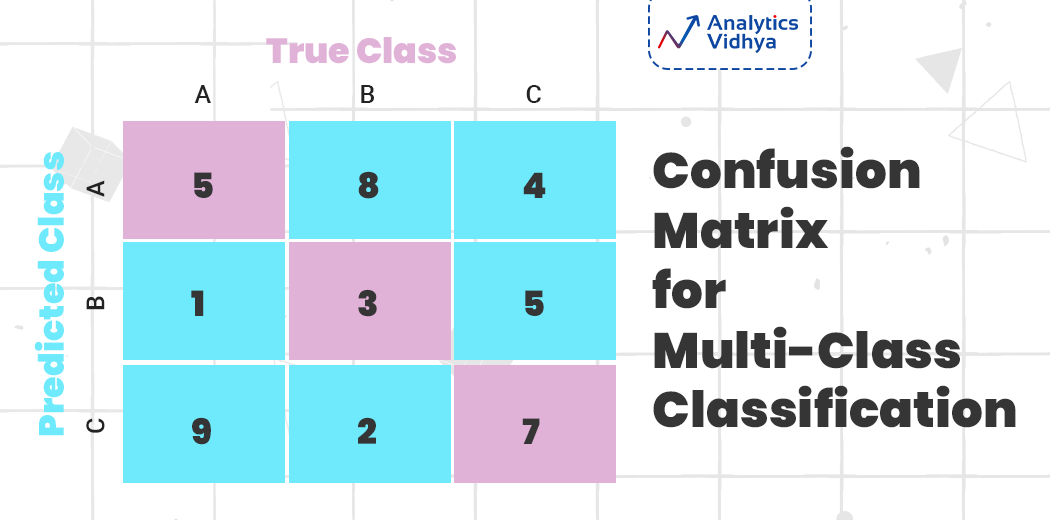

<p style='text-align:center'><a href="https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2021%2F06%2Fconfusion-matrix-for-multi-class-classification%2F&psig=AOvVaw1QhkHhtA2GtYraHxfpCJA8&ust=1682993734408000&source=images&cd=vfe&ved=0CBMQjhxqFwoTCIiRrq-G0_4CFQAAAAAdAAAAABAQ">3x3 Confusion Matrix</a></p>


In [400]:
# Creates a confusion matrix based on actual y_test and predicted y_test
cm = confusion_matrix(y_test, pred)  

# Print confusion matrix and display the classification report from confusion matrix
print(cm)
print(classification_report(y_test, pred))

[[ 90  68  12]
 [ 32 247  29]
 [  2  35  63]]
              precision    recall  f1-score   support

           1       0.73      0.53      0.61       170
           2       0.71      0.80      0.75       308
           3       0.61      0.63      0.62       100

    accuracy                           0.69       578
   macro avg       0.68      0.65      0.66       578
weighted avg       0.69      0.69      0.69       578



From the confusion Matrix, the rows represent teh actual values of credit score, while the columns represent the predicted value of the credit score. The first row, first column (90), represents the True Positive value for the credit score 1. The second row, second column (247), represents the True Positive value for the credit score 2. The third row, third column (63), represents the True Positive value for the credit score 3. Thus, we can see that the diagonals provides the TP value for each credit score respectively. 

From the given confusion matrix, we can calculate the accuracy and precision of the model. To get the report of the confusion matrix on the information regarding accuracy, precision and other model performance measurement, we can call the classification report on the actual y and the predicted y, which gives the models performance measurement based on the confusion matrix and the TP, TN, FP, FN values obtained from the confusion matrix. 

The model's overall accuracy is relatively good (0.69), but the precision and recall for each class are varied, suggesting that some credit scores are more accurately predicted by the model than others. The model is on average equally good at predicting all three credit ratings, as evidenced by the weighted average precision and recall of 0.69.

## Quadratic Weighted Kappa (QWK)

Quadratic Weighted Kappa is a statistical measure that is used to evaluate the agreement between two raters which are a set of multiclass labels and a set of predictions. It attempts to take into account the similarity between the classes, beyond only the class, rather than just focusing on the accuracy of the correlation between predictions and labels.
https://verosssr.com/cacefc41e57e499a9f4c8cdce878df5d

In the context of machine learning, it is often used to evaluate the performance of a classification model, particularly in cases where the classes are imbalanced. QWK is calculated based on the confusion matrix, which shows the number of true positives, false positives, false negatives, and true negatives for each class. 

The number of observed agreements and the number of agreements that would happen by chance are used to determine the QWK score. It can be determined from a confusion matrix, which is a table that records how many times each rater gave a given set of items a possible rating. Given that some classes could be harder to predict accurately than others, QWK score evaluates the correlation between two sets of labels which varies in the range of numbers between -1 and 1, with -1 denoting no agreement, 0 denoting the agreement predicted is worse than chance, and 1 denoting complete agreement. A higher QWK score indicates better performance. A QWK score of 0.5 or higher is generally considered a good agreement. (ChatGPT)


In [401]:
# calculate the qwk score with the parameters of y_test, y_predicted and weights as 'quadratic'
qwk_score = cohen_kappa_score(y_test, pred, weights='quadratic')
print('QWK score:', qwk_score)

QWK score: 0.553893433996155


The QWK score is determined using the cohen_kappa_score function from scikit-learn's metrics module. To calculate the QWK score, the original y_test and predicted y_test values are passed with the weight as 'quadratic'. The weights parameter set to 'quadratic', indicates that it applies quadratic weights to the errors, giving larger penalties to important disagreements between true and predicted labels. This can help to provide a more accurate measure of the agreement between true and predicted labels, especially when the differences between the labels are more significant (ChatGPT).

From the given QWK score for the original y_test value and predicted y_test value, we can see the value outputted is more than 0, indicating the actual and predicted labels is better than random choice. The value is also higher than 0.5 (the average qwk score for best agreement) and also more than the benchmark set in Kaggle. So, we can assume the model is good enough based on the good QWK score and the good accuarcy and prediction values from the confusion matrix.

<h2><u><b>Kaggle Submission - Credit Score Evaluation</b></u></h2>


In [402]:
# Read the prediction file 
credit_score_sub = pd.read_csv('Credit-Scores-Submission.csv')

In [403]:
# prints the number of rows and columns on the prediction filr
credit_score_sub.shape

(900, 23)

#### Separate Features Values Only

In [404]:
X_2 = credit_score_sub.iloc[:, :].values 
X_2[0:1]

array([[8.97600000e+04, 7.00000000e+00, 1.70000000e+01, 1.00000000e+00,
        6.03352500e+04, 5.12093750e+03, 9.00000000e+00, 9.00000000e+00,
        1.50000000e+01, 2.00000000e+00, 4.40000000e+01, 1.60000000e+01,
        1.10400000e+01, 7.00000000e+00, 1.00000000e+00, 1.81422000e+03,
        3.75929199e+01, 2.06000000e+02, 1.00000000e+00, 9.24254714e+01,
        9.18392855e+01, 1.03000000e+02, 5.29876377e+02]])

#### Normalize Feature Based on Training Model

In [405]:
# transform the data based on the MinMaxScalar instance 
X_pred = mc.transform(X_2)

#### Feature Selection

In [406]:
# Print the filtered columns
print(filtered_cols)

# filter the features in X_pred
filt_X_test = selector.transform(X_pred)

[ 4  5  6  7  8  9 10 11 12 13 14 15 17 18 20 22]


#### Predict Credit Score

In [407]:
# predict credit score based on the previous model
pred_score = cls.predict(filt_X_test)
pred_score

array([1, 1, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2, 3, 3, 1, 2, 2,
       1, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1, 3, 3, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 1, 2, 1, 2, 3, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 2, 2, 3, 2, 3, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3, 2, 1, 1, 3, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 3, 1, 1, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 1, 2, 2, 3, 1, 2, 2, 2, 3, 2,
       2, 3, 1, 3, 3, 2, 3, 2, 1, 1, 2, 1, 2, 2, 3, 2, 1, 1, 3, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 1, 2,

#### Write Prediction to csv file

In [408]:
# Open the input CSV file and read its contents into a list
with open('32885742-Sarviin_Hari-final.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    rows = list(reader)
    
# Iterate over the rows of the input CSV file and add the data to the corresponding row
for i, row in enumerate(rows):
    if i > 0:
        row[1] = pred_score[i-1]

# This is the updated row for each ID with the corresponding credit score
print(rows)  

# Open a new CSV file and write the updated rows to it
with open('32885742-Sarviin_Hari-final.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(rows)

[['ï»¿ID', 'Credit_Score'], ['89760', 1], ['44011', 1], ['54153', 1], ['25314', 2], ['58305', 2], ['126979', 3], ['138094', 3], ['77050', 2], ['153787', 2], ['122771', 2], ['117791', 2], ['104748', 2], ['99837', 3], ['155383', 1], ['71124', 1], ['96454', 2], ['19777', 2], ['42672', 2], ['35371', 1], ['55356', 2], ['30319', 2], ['57049', 2], ['141564', 2], ['78538', 2], ['54524', 2], ['35267', 2], ['59001', 2], ['97441', 2], ['99571', 2], ['24529', 2], ['147311', 2], ['67849', 3], ['128958', 1], ['104757', 3], ['148388', 1], ['128119', 1], ['112002', 1], ['111379', 1], ['19794', 2], ['78996', 3], ['106800', 2], ['60759', 2], ['142522', 2], ['110603', 1], ['14988', 1], ['114813', 2], ['121908', 2], ['54418', 2], ['103353', 2], ['35455', 1], ['46151', 2], ['90035', 2], ['21336', 2], ['98340', 3], ['67511', 1], ['63572', 2], ['32540', 2], ['109005', 3], ['113004', 3], ['121402', 1], ['119555', 2], ['139820', 3], ['148320', 3], ['30115', 1], ['62940', 2], ['83449', 2], ['108944', 1], ['6830

<h2><u><b>Conclusion</b></u></h2>

From this project, I have learnt that a predictive model of Support Vector Machine (SVM) is a strong library that can be used in a wide range of problems involving predicting values. I have also learnt that SVM can not only be used for classification purposes (as attempted in the project), but also can be used to solve for regression problems. I have also learnt the importance of normalizing or scaling the data in the pre-processing stage before processing a predictive model. I have also learnt about a the importance of using appropriate hyperparameters and tuning the hyperparameters in a SVM model to get a good predictive model that has an optimal performance. I also learnt how to evaluate the model using various metrics and validation techniques to ensure that it is accurate and generalizes well to new data. Overall, I hope the knowledge gained from this project will help me in the field of my study in the future.